In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

In [64]:
# Carregar os dados do CSV
dados = pd.read_csv('/content/Desempenho_alunos.csv')
#visualizando
print('>>>>> Visualizando os Dados <<<<<\n')
print(dados.shape)

dados.head()

>>>>> Visualizando os Dados <<<<<

(145, 33)


,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [65]:
# Converter variáveis categóricas usando pd.get_dummies
X_encoded = pd.get_dummies(dados)
dados = X_encoded

Salvando o modelo com joblib

In [66]:
from sklearn.svm import SVC
import pickle

In [67]:
# Suponha que você tenha um modelo SVM treinado chamado 'modelo_svm'
modelo_svm = SVC(kernel='linear', C=1.0)  # Substitua pelos parâmetros do seu modelo


In [68]:
#Separando a coluna e tirando as colunas que não são necessárias
y = dados['GRADE'] #target
X = dados.drop(columns = ['22','24','25','27','28','29','COURSE ID'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 25)


In [69]:
# Inicializando o classificador SVM com kernel linear
modelo_svm = SVC(kernel='linear')

In [70]:
# Treine o modelo
modelo_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [71]:
previsoes = modelo_svm.predict(X_test)

In [72]:
previsoes

array([2, 3, 1, 2, 7, 3, 7, 1, 2, 5, 2, 2, 5, 3, 1, 3, 5, 3, 1, 1, 1, 1,
       7, 1, 1, 1, 1, 5, 2])

In [73]:
# Salve o modelo em um arquivo .pkl
with open('modelo_svm.pkl', 'wb') as arquivo_pkl:
    pickle.dump(modelo_svm, arquivo_pkl)


In [74]:
# Carregue o modelo de volta a partir do arquivo .pkl
with open('modelo_svm.pkl', 'rb') as arquivo_pkl:
    modelo_carregado = pickle.load(arquivo_pkl)

In [75]:
# Use o modelo carregado para fazer previsões
y_pred_carregado = modelo_carregado.predict(X_test)

In [76]:
# Avalie a precisão do modelo carregado
precisao_carregado = accuracy_score(y_test, y_pred_carregado)
print(f'Precisão do modelo SVM carregado: {precisao_carregado}')

Precisão do modelo SVM carregado: 0.9310344827586207


Acurácia

In [77]:
# Avaliando a precisão do modelo
acuracia = accuracy_score(y_test, previsoes)
print(f'Acurácia: {acuracia}')

Acurácia: 0.9310344827586207


#Vendo as melhores colunas

In [78]:
from matplotlib import pyplot as plt
import numpy as np

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
# Inicialize o classificador RandomForest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [81]:
# Crie um DataFrame com as importâncias das features
parametros = pd.DataFrame({'feature': X_train.columns, 'Importancia': random_forest.feature_importances_})

In [82]:
# Ordene o DataFrame pela importância das features em ordem decrescente
parametros = parametros.sort_values(by='Importancia', ascending=False)


In [83]:
# Selecione as cinco principais features
top5_parametros = parametros.head(5)


In [84]:
# Exibir as cinco principais features e suas importâncias
print(top5_parametros)


   feature  Importancia
24   GRADE     0.190771
16      17     0.044973
15      16     0.040093
12      13     0.037872
10      11     0.036359


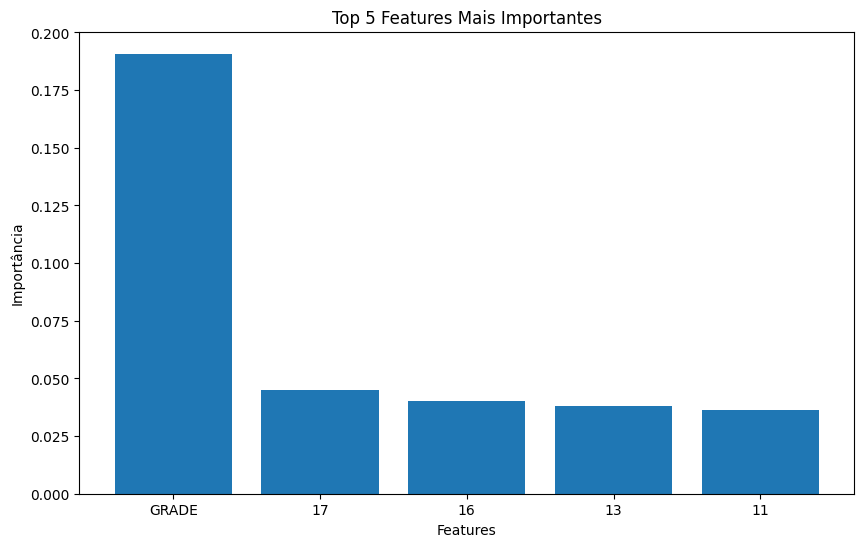

In [85]:
# Cria um gráfico de barras para visualizar as cinco principais features
plt.figure(figsize=(10, 6))
plt.bar(top5_parametros['feature'], top5_parametros['Importancia'])
plt.xlabel('Features')
plt.ylabel('Importância')
plt.title('Top 5 Features Mais Importantes')
plt.show()

#Vendo todos os modelos

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

In [87]:

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [88]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=100, batch_size = 10)
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=10, hidden_layer_sizes=(10, 10), max_iter=100)

In [89]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [90]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [91]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
classifiers = [mlp, tree, knn, logistic, nb]
classifier_names = ["Rede Neural", "Árvore de Decisão", "K-NN", "Regressão Logística", "Naive Bayes"]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Resultados para Rede Neural:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.45      0.62        11
           2       0.45      1.00      0.62         5
           3       0.80      0.80      0.80         5
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         3

    accuracy                           0.72        29
   macro avg       0.61      0.61      0.58        29
weighted avg       0.84      0.72      0.72        29



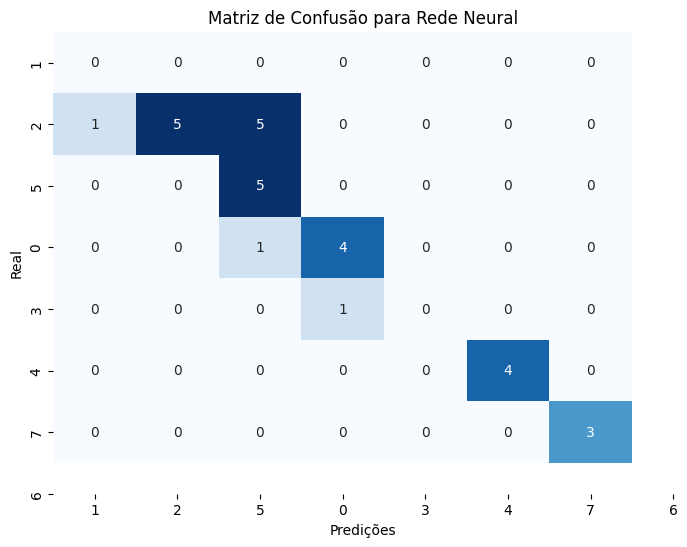

Resultados para Árvore de Decisão:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         3

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



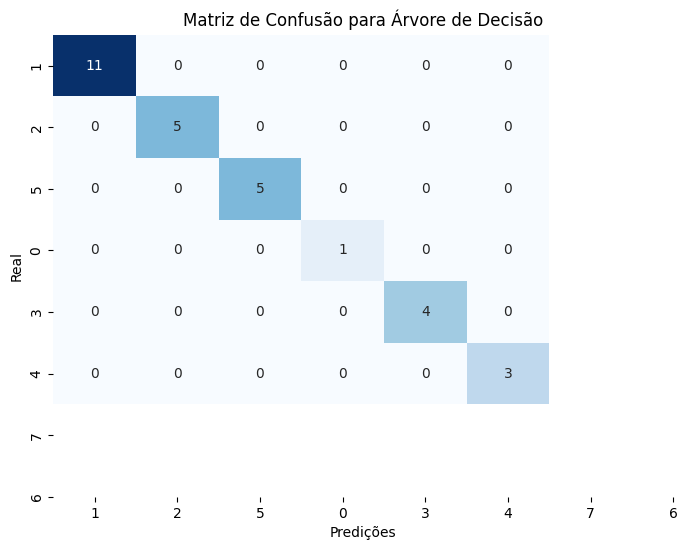

Resultados para K-NN:
              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       0.50      0.20      0.29         5
           3       0.80      0.80      0.80         5
           4       0.00      0.00      0.00         1
           5       0.75      0.75      0.75         4
           6       0.00      0.00      0.00         0
           7       1.00      0.33      0.50         3

    accuracy                           0.66        29
   macro avg       0.53      0.43      0.44        29
weighted avg       0.68      0.66      0.63        29



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

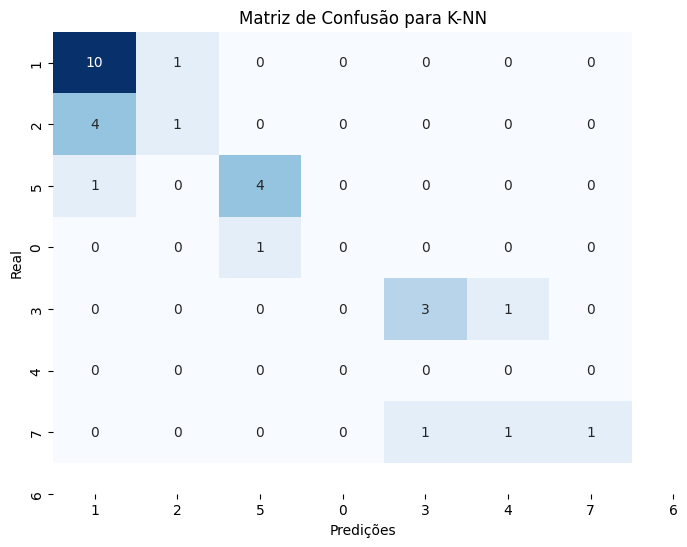

Resultados para Regressão Logística:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.82      0.90        11
           2       0.50      0.80      0.62         5
           3       0.33      0.20      0.25         5
           4       0.00      0.00      0.00         1
           5       0.67      0.50      0.57         4
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00         3

    accuracy                           0.66        29
   macro avg       0.44      0.41      0.42        29
weighted avg       0.72      0.66      0.67        29



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


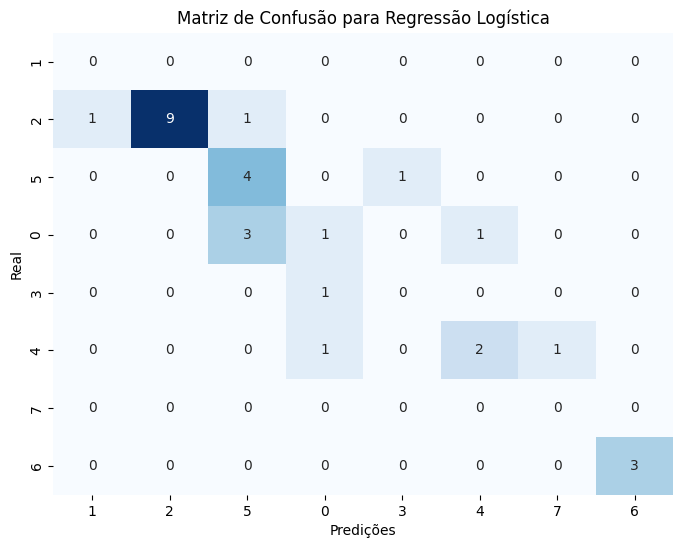

Resultados para Naive Bayes:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       0.33      1.00      0.50         1
           5       1.00      0.50      0.67         4
           7       1.00      1.00      1.00         3

    accuracy                           0.93        29
   macro avg       0.89      0.92      0.86        29
weighted avg       0.98      0.93      0.94        29



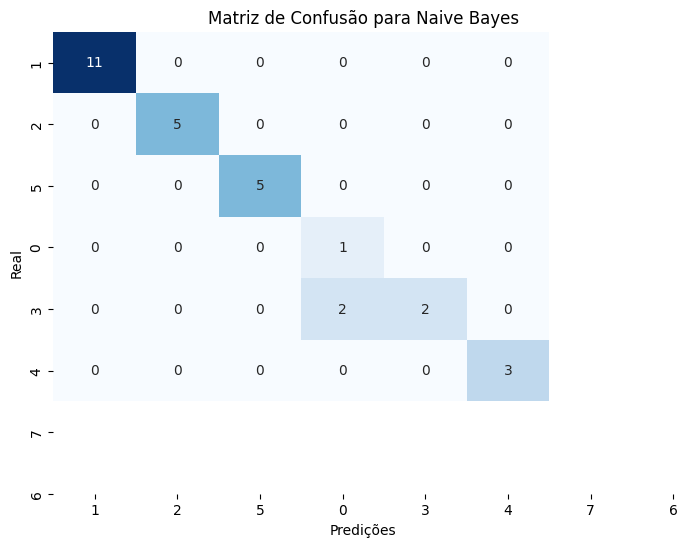

In [93]:
for clf, clf_name in zip(classifiers, classifier_names):
    y_pred = clf.predict(X_test)
    print(f"Resultados para {clf_name}:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dados['GRADE'].unique(), yticklabels=dados['GRADE'].unique(), cbar=False)
    plt.xlabel('Predições')
    plt.ylabel('Real')
    plt.title(f"Matriz de Confusão para {clf_name}")
    plt.show()

Resultados para Rede Neural:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.45      0.62        11
           2       0.45      1.00      0.62         5
           3       0.80      0.80      0.80         5
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         3

    accuracy                           0.72        29
   macro avg       0.61      0.61      0.58        29
weighted avg       0.84      0.72      0.72        29



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

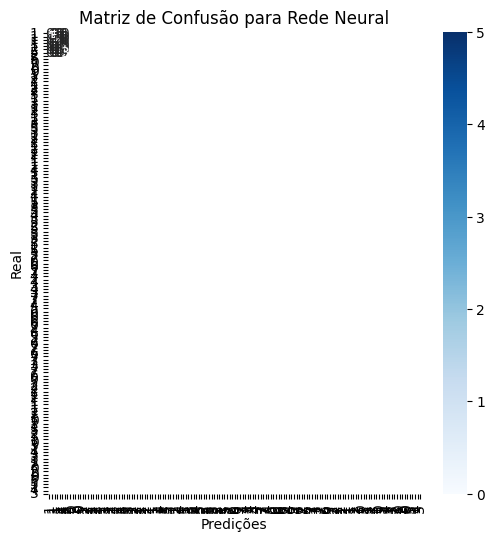

Resultados para Árvore de Decisão:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         3

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



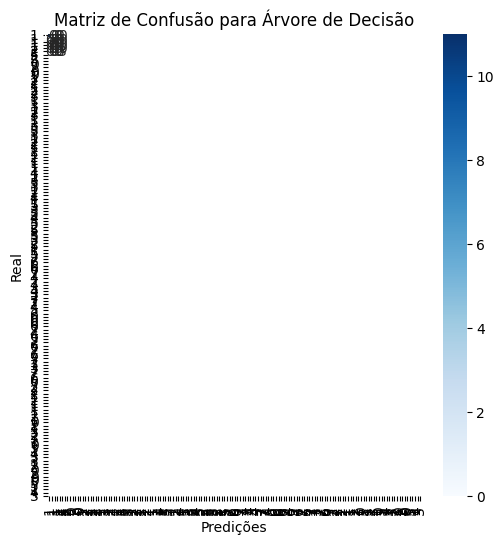

Resultados para K-NN:
              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       0.50      0.20      0.29         5
           3       0.80      0.80      0.80         5
           4       0.00      0.00      0.00         1
           5       0.75      0.75      0.75         4
           6       0.00      0.00      0.00         0
           7       1.00      0.33      0.50         3

    accuracy                           0.66        29
   macro avg       0.53      0.43      0.44        29
weighted avg       0.68      0.66      0.63        29



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

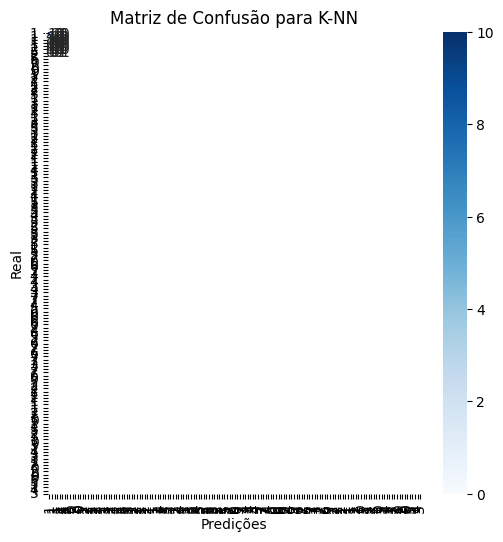

Resultados para Regressão Logística:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.82      0.90        11
           2       0.50      0.80      0.62         5
           3       0.33      0.20      0.25         5
           4       0.00      0.00      0.00         1
           5       0.67      0.50      0.57         4
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00         3

    accuracy                           0.66        29
   macro avg       0.44      0.41      0.42        29
weighted avg       0.72      0.66      0.67        29



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


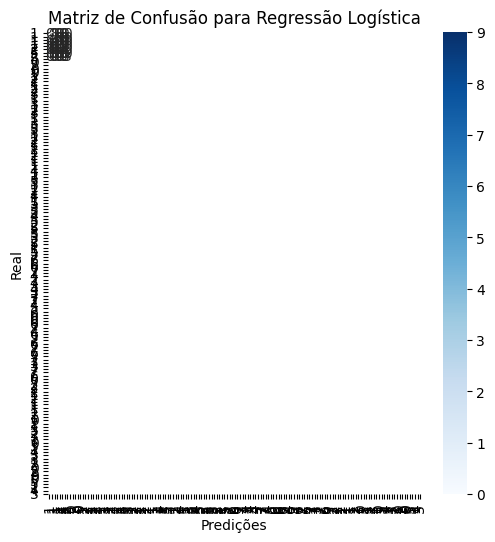

Resultados para Naive Bayes:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       0.33      1.00      0.50         1
           5       1.00      0.50      0.67         4
           7       1.00      1.00      1.00         3

    accuracy                           0.93        29
   macro avg       0.89      0.92      0.86        29
weighted avg       0.98      0.93      0.94        29



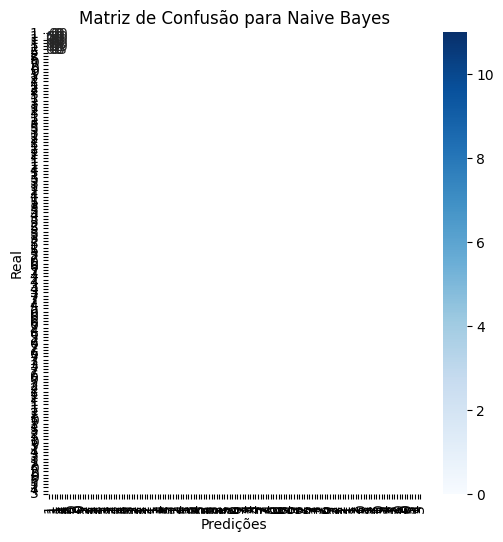

In [94]:
for clf, clf_name in zip(classifiers, classifier_names):
    y_pred = clf.predict(X_test)
    print(f"Resultados para {clf_name}:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dados['GRADE'], yticklabels=dados['GRADE'])
    plt.xlabel('Predições')
    plt.ylabel('Real')
    plt.title(f"Matriz de Confusão para {clf_name}")
    plt.show()